In [14]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

### 1) $J_2 = 0$

In [16]:
N = 10
J1,J3,D,h = 1.0,0.1,0.1,2.0
n::Int64 = 2
mz::Int64 = 2*n-N
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_mz_1D_op(N,mz)
    println(length(basis_list))
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    scar_state::Vector{Float64} = scar_state_1D(N,n,basis_list)
#     H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
#                             third_nbr_bond_list,use_sparse) 
end;

615
  0.001180 seconds (5.68 k allocations: 812.320 KiB)


In [7]:
@time begin
    odlro_op,H_size = odlro_matrix(N,basis_list,basis_new1,basis_new2)
    odlro::Float64 = (4/N^2)*dot(scar_state,odlro_op*scar_state)
end;

  0.529120 seconds (1.65 M allocations: 115.486 MiB, 5.54% gc time, 93.45% compilation time)


In [5]:
n::Int64 = 2
N_list::Vector{Int64} = Vector{Int64}()
odlro_list::Vector{Float64} = Vector{Float64}()

@time begin
    for N in 6:2:24
        nearest_bond_list = gen_bonds_1D(N,boundary)
        third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
        mz::Int64 = 2*n-N
        basis_list = gen_basis_mz_1D_op(N,mz)
        basis_new1 = similar(basis_list[1])
        basis_new2 = similar(basis_list[1])
        scar_state::Vector{Float64} = scar_state_1D(N,n,basis_list)
        odlro_op,H_size = odlro_matrix(N,basis_list,basis_new1,basis_new2)
        odlro::Float64 = (4/N^2)*dot(scar_state,odlro_op*scar_state)
        push!(N_list,N)
        push!(odlro_list,odlro)
    end
end;

122.349026 seconds (20.58 M allocations: 4.621 GiB, 0.44% gc time)


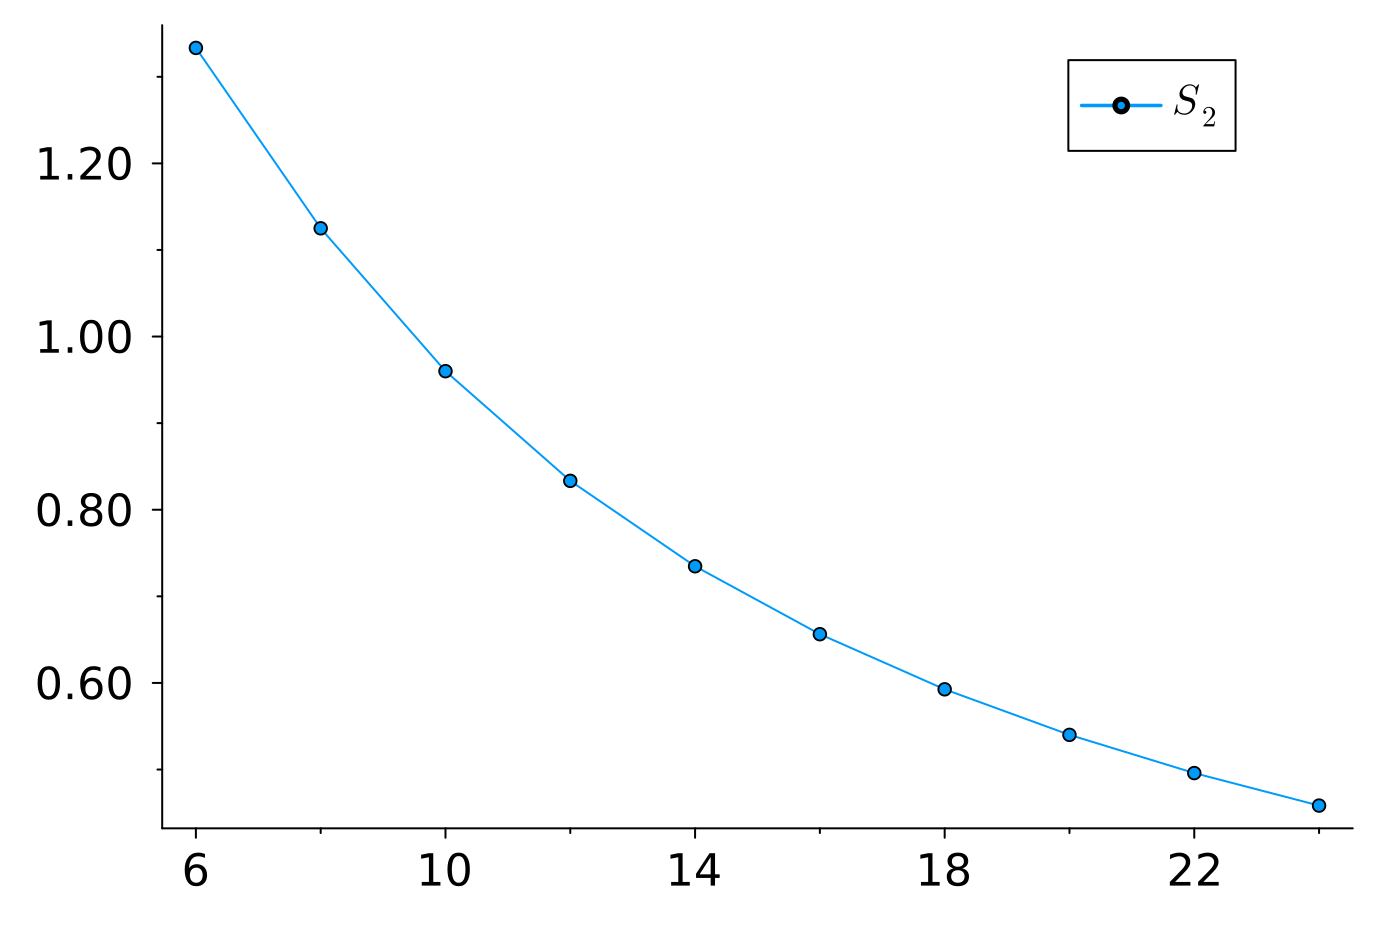

In [11]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

p = plot(N_list,odlro_list,marker=:circle,markersize=3.5,label="\$S_{$(n)}\$",
           size=plot_size,dpi=200)

plot!(left_margin=4mm,right_margin=4mm,top_margin=1.2mm,bottom_margin=5mm)
plot!(framestyle=:axis)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.85,0.9),legendfontsize=14,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=1)

x1,x_step,x2 = 6,4,24
y1,y_step,y2 = 0.6,0.2,1.2
# y1,y_step,y2 = -1.4,0.005,-1.380
xticks = (x1:x_step:x2,[@sprintf("%.0f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.2f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:out)

display(p)

### 2) $J_2 \neq 0$

In [15]:
N = 8
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false
n1::Int64,n2::Int64,n3::Int64,n4::Int64 = 1,2,3,4
mz1::Int64,mz2::Int64,mz3::Int64,mz4::Int64 = (2*n1-N),(2*n2-N),(2*n3-N),(2*n4-N)

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list1 = gen_basis_mz_1D_op(N,mz1)
    basis_list2 = gen_basis_mz_1D_op(N,mz2)
    basis_list3 = gen_basis_mz_1D_op(N,mz3)
    basis_list4 = gen_basis_mz_1D_op(N,mz4)
    println(length(basis_list1)," ",length(basis_list2)," ",length(basis_list3)," ",length(basis_list4))
    basis_new1 = similar(basis_list1[1])
    basis_new2 = similar(basis_list1[1])
    scar_state1::Vector{Float64} = scar_state_1D(N,n1,basis_list1)
    scar_state2::Vector{Float64} = scar_state_1D(N,n2,basis_list2)
    scar_state3::Vector{Float64} = scar_state_1D(N,n3,basis_list3)
    scar_state4::Vector{Float64} = scar_state_1D(N,n4,basis_list4)
    scar_energy1::Float64 = mz1*h+N*D
    scar_energy2::Float64 = mz2*h+N*D
    scar_energy3::Float64 = mz3*h+N*D
    scar_energy4::Float64 = mz4*h+N*D
    H_XY1,H_size1 = Ham_XY_1D(J1,J3,D,h,N,basis_list1,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse) 
    H_XY2,H_size2 = Ham_XY_1D(J1,J3,D,h,N,basis_list2,basis_new1,basis_new2,nearest_bond_list,
                        third_nbr_bond_list,use_sparse)  
    H_XY3,H_size3 = Ham_XY_1D(J1,J3,D,h,N,basis_list3,basis_new1,basis_new2,nearest_bond_list,
                        third_nbr_bond_list,use_sparse)  
    H_XY4,H_size4 = Ham_XY_1D(J1,J3,D,h,N,basis_list4,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

36 266 784 1107
  0.105690 seconds (107.76 k allocations: 23.376 MiB)


In [16]:
basis_new = similar(basis_list1[1])
sec_nbr_bond_list = gen_2nd_nbr_bonds_1D(N,boundary)

J2_list::Vector{Float64} = Vector{Float64}(LinRange(0.00,0.1,300))
scar_eigenspec_overlap_list1::Vector{Float64} = Vector{Float64}(undef,H_size1)
scar_eigenspec_overlap_list2::Vector{Float64} = Vector{Float64}(undef,H_size2)
scar_eigenspec_overlap_list3::Vector{Float64} = Vector{Float64}(undef,H_size3)
scar_eigenspec_overlap_list4::Vector{Float64} = Vector{Float64}(undef,H_size4)

odlro_list1::Vector{Float64} = Vector{Float64}(undef,length(J2_list))
odlro_list2::Vector{Float64} = Vector{Float64}(undef,length(J2_list))
odlro_list3::Vector{Float64} = Vector{Float64}(undef,length(J2_list))
odlro_list4::Vector{Float64} = Vector{Float64}(undef,length(J2_list))

@time begin
    for (i,J2) in enumerate(J2_list)
        H_sec_nbr1,size_a = Ham_2nd_nbr_1D(N,basis_list1,basis_new,sec_nbr_bond_list,use_sparse)
        H_sec_nbr2,size_b = Ham_2nd_nbr_1D(N,basis_list2,basis_new,sec_nbr_bond_list,use_sparse)
        H_sec_nbr3,size_c = Ham_2nd_nbr_1D(N,basis_list3,basis_new,sec_nbr_bond_list,use_sparse)
        H_sec_nbr4,size_d = Ham_2nd_nbr_1D(N,basis_list4,basis_new,sec_nbr_bond_list,use_sparse)
        H_total1 = H_XY1 + J2*H_sec_nbr1
        H_total2 = H_XY2 + J2*H_sec_nbr2
        H_total3 = H_XY3 + J2*H_sec_nbr3
        H_total4 = H_XY4 + J2*H_sec_nbr4
        total_energy1,total_eigenvector1 = eigen(H_total1)
        total_energy2,total_eigenvector2 = eigen(H_total2)
        total_energy3,total_eigenvector3 = eigen(H_total3)
        total_energy4,total_eigenvector4 = eigen(H_total4)

        for (j,E) in enumerate(total_energy1)
            scar_eigenspec_overlap_list1[j] = abs2(dot(total_eigenvector1[:,j],scar_state1))
        end
        max_overlap1,max_index1 = findmax(scar_eigenspec_overlap_list1)
        derived_scar1 = total_eigenvector1[:,max_index1]
        
        for (j,E) in enumerate(total_energy2)
            scar_eigenspec_overlap_list2[j] = abs2(dot(total_eigenvector2[:,j],scar_state2))
        end
        max_overlap2,max_index2 = findmax(scar_eigenspec_overlap_list2)
        derived_scar2 = total_eigenvector2[:,max_index2]
        
        for (j,E) in enumerate(total_energy3)
            scar_eigenspec_overlap_list3[j] = abs2(dot(total_eigenvector3[:,j],scar_state3))
        end
        max_overlap3,max_index3 = findmax(scar_eigenspec_overlap_list3)
        derived_scar3 = total_eigenvector3[:,max_index3]
        
        for (j,E) in enumerate(total_energy4)
            scar_eigenspec_overlap_list4[j] = abs2(dot(total_eigenvector4[:,j],scar_state4))
        end
        max_overlap4,max_index4 = findmax(scar_eigenspec_overlap_list4)
        derived_scar4 = total_eigenvector4[:,max_index4]
        
        odlro_op1,a = odlro_matrix(N,basis_list1,basis_new1,basis_new2)
        odlro1::Float64 = (4/N^2)*dot(derived_scar1,odlro_op1*derived_scar1)
        odlro_list1[i] = odlro1
        
        odlro_op2,b = odlro_matrix(N,basis_list2,basis_new1,basis_new2)
        odlro2::Float64 = (4/N^2)*dot(derived_scar2,odlro_op2*derived_scar2)
        odlro_list2[i] = odlro2
        
        odlro_op3,c = odlro_matrix(N,basis_list3,basis_new1,basis_new2)
        odlro3::Float64 = (4/N^2)*dot(derived_scar3,odlro_op3*derived_scar3)
        odlro_list3[i] = odlro3
        
        odlro_op4,d = odlro_matrix(N,basis_list4,basis_new1,basis_new2)
        odlro4::Float64 = (4/N^2)*dot(derived_scar4,odlro_op4*derived_scar4)
        odlro_list4[i] = odlro4
    end
end;

top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\ODLRO")
if !isdir(top_folder)
    mkpath(top_folder)
end

J2_max = J2_list[end]
for n in [n1,n2,n3,n4]
    file_name = joinpath(top_folder,"Sn=$(n)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(J2_max).jld2")
    if n == 1
        odlro_list = odlro_list1
    elseif n == 2
        odlro_list = odlro_list2
    elseif n == 3
        odlro_list = odlro_list3
    elseif n == 4
        odlro_list = odlro_list4
    end
    @save file_name J2_vals=J2_list odlro_vals=odlro_list
end;

353.928371 seconds (34.50 M allocations: 33.263 GiB, 1.20% gc time)


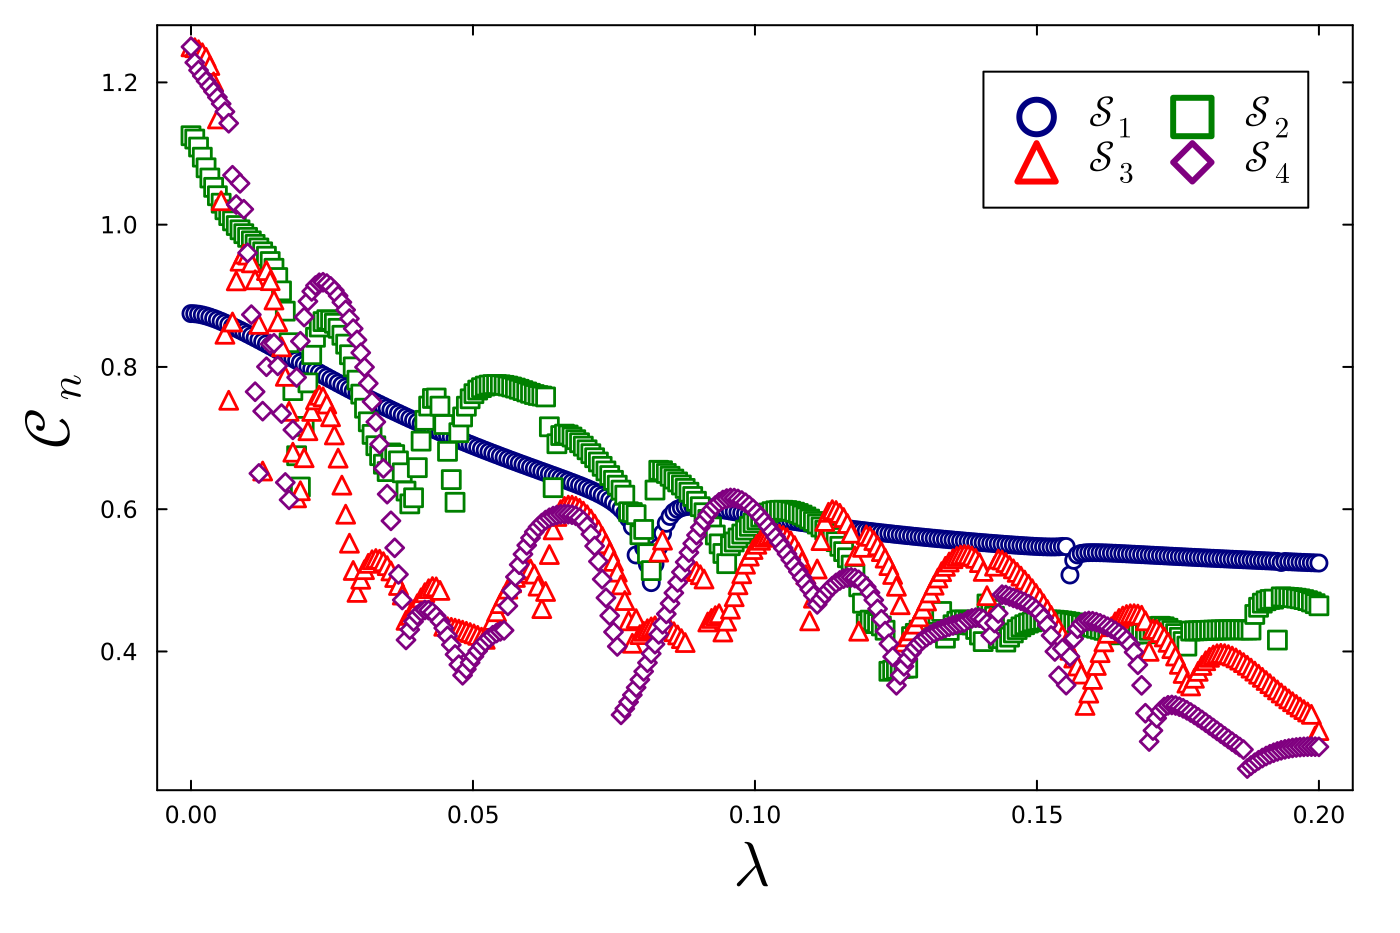

In [13]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

p = scatter(J2_list,odlro_list1,marker=:circle,markercolor=:white,markerstrokecolor=:navy,markerstrokewidth=1.5,
             ms=4.5,label="\$\\mathcal{S}{}_{1}\$",size=plot_size,dpi=200)
scatter!(J2_list,odlro_list2,marker=:rect,markercolor=:white,markerstrokecolor=:green,markerstrokewidth=1.5,
          ms=4.5,label="\$\\mathcal{S}{}_{2}\$")
scatter!(J2_list,odlro_list3,marker=:utriangle,markercolor=:white,markerstrokecolor=:red,markerstrokewidth=1.5,
          ms=4.5,label="\$\\mathcal{S}{}_{3}\$")
scatter!(J2_list,odlro_list4,marker=:diamond,markercolor=:white,markerstrokecolor=:purple,markerstrokewidth=1.5,
          ms=4.5,label="\$\\mathcal{S}{}_{4}\$")

plot!(left_margin=4mm,right_margin=4mm,top_margin=1.2mm,bottom_margin=5mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
# plot!(legend_position=(0.13,0.17),legendfontsize=14,legend_background_color=:white,
#     legend_foreground_color=:black,legend_columns=2)
plot!(legend_position=(0.78,0.88),legendfontsize=14,legend_background_color=:white,
    legend_foreground_color=:black,legend_columns=2)
# plot!(ylims=(-3.45,-3.35))

xlabel!("\$\\lambda\$",guidefontsize=21)
ylabel!("\$\\mathcal{C{}_n}\$",guidefontsize=21)
# title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0.00,0.01,0.05
# y1,y_step,y2 = 0.9,0.1,1.3
y1,y_step,y2 = 0.4,0.2,1.2
xticks = (x1:x_step:x2,[@sprintf("%.2f",x) for x in x1:x_step:x2])
yticks = (y1:y_step:y2,[@sprintf("%.1f",y) for y in y1:y_step:y2])
xminor_ticks = 2
yminor_ticks = 2
# plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
#       xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=17,tick_direction=:in)
# plot!(xlims=(x1-0.0005,x2+0.0005))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)\\ODLRO"
if !isdir(folder_name)
    mkpath(folder_name)
end

# file_path = joinpath(folder_name,"ODLRO_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_J2_D=$(round(D,digits=6))_h=$(round(h,digits=6))_J2max=$(J2_max).png")

display(p)
# savefig(p,file_path)